In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
data = pd.read_excel('/content/iris (1).xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [28]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [29]:
data['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

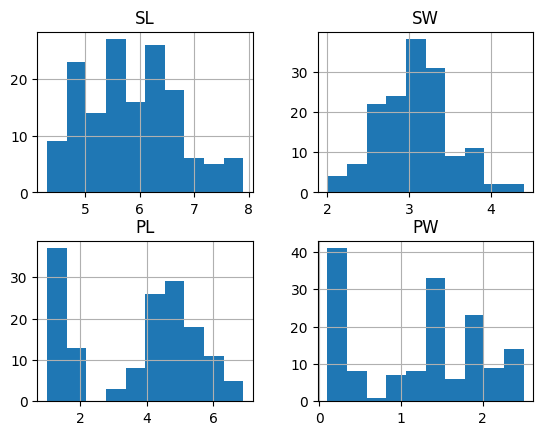

In [30]:
freqgraph = data.select_dtypes(include='float64')
freqgraph.hist()
plt.show()

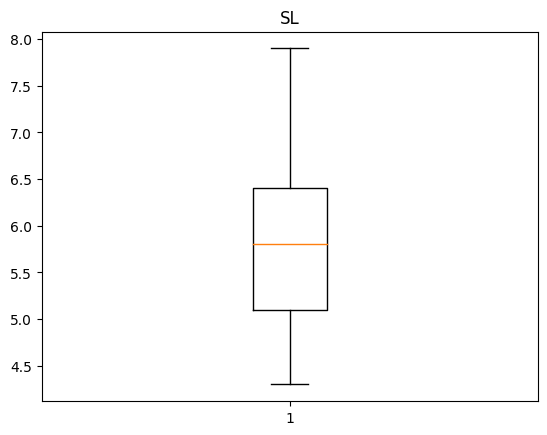

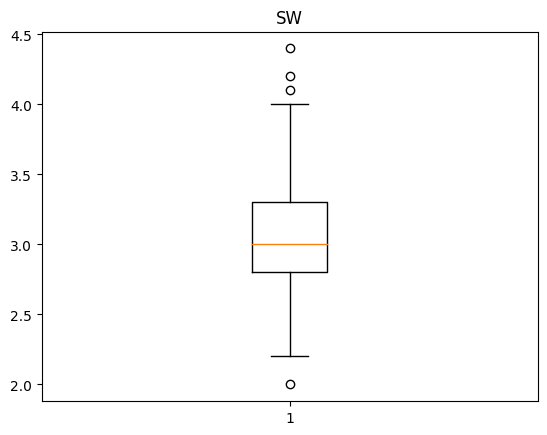

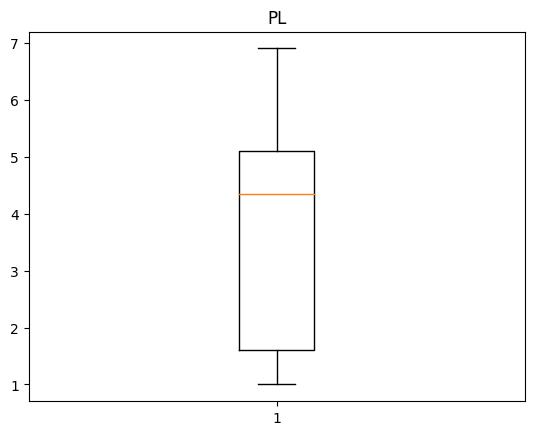

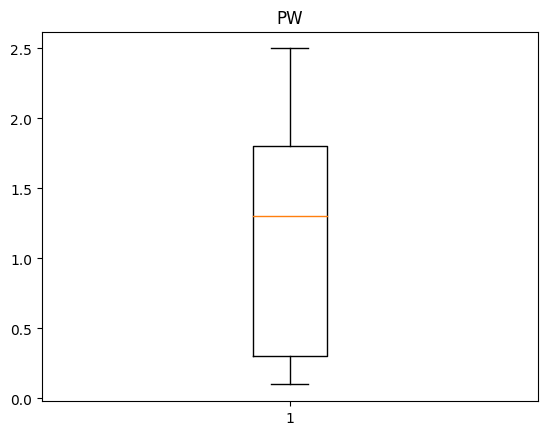

In [31]:
#Checking outliers
num_columns = data.select_dtypes(include='float64')
for i in num_columns:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)



In [32]:
#Handling outliers using IQR method
Q1=np.percentile(data['SW'],25,method='midpoint')
Q2=np.percentile(data['SW'],50,method='midpoint')
Q3=np.percentile(data['SW'],75,method='midpoint')
IQR=Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("lower limit:",low_lim)
print("upper limit:",up_lim)
outlier=[]
for x in data['SW']:
  if(x<low_lim) or (x>up_lim):
    outlier.append(x)
print(outlier)
#clip method to handle
data['SW'] = data['SW'].clip(lower=low_lim,upper=up_lim)


lower limit: 2.05
upper limit: 4.05
[4.4, 4.1, 4.2, 2.0]


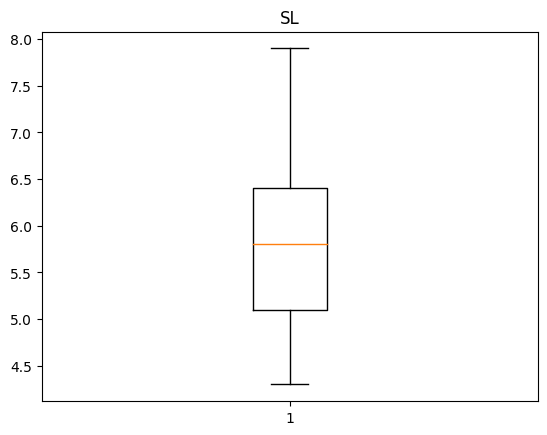

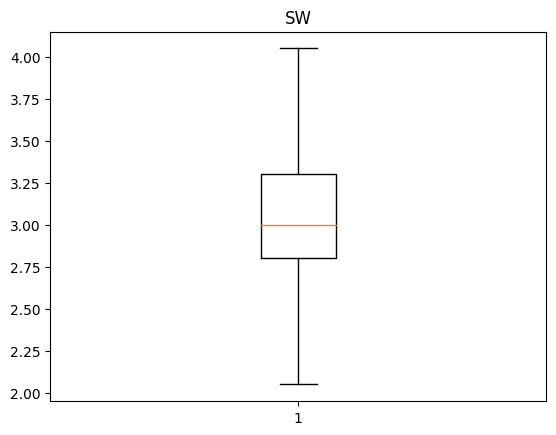

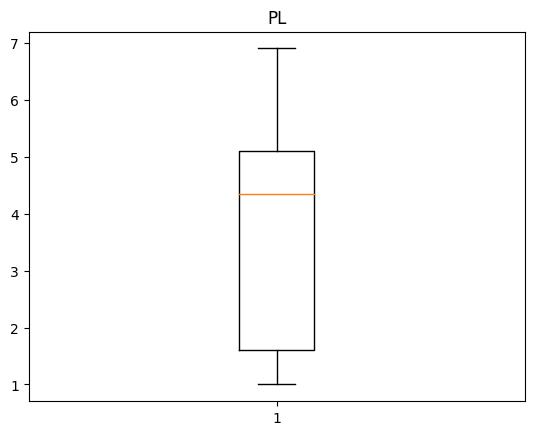

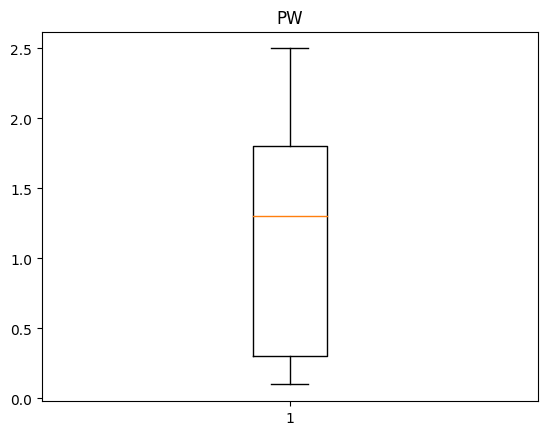

In [33]:
num_columns = data.select_dtypes(include='float64')
for i in num_columns:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)


In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Classification'] = le.fit_transform(data['Classification'])
data.head(10)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


<Axes: >

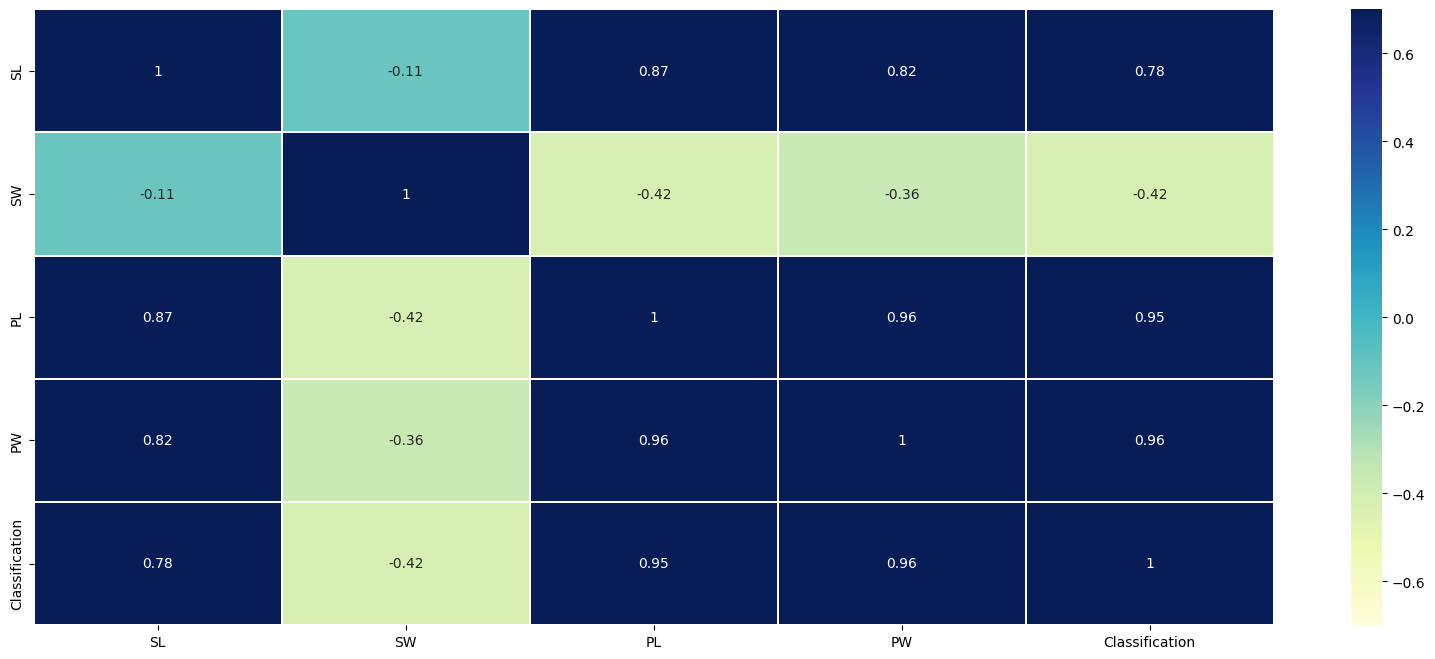

In [35]:
corrmatrix= data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-0.7,vmax=0.7,annot=True,linewidths=0.2,cmap='YlGnBu')

In [36]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [37]:
data.shape

(150, 5)

In [38]:
y = data['Classification']
x= data.drop(['Classification'],axis=1)

In [39]:
data.shape

(150, 5)

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=.25)

In [41]:
from sklearn import linear_model
lin_model = linear_model.LinearRegression()


In [42]:
model = lin_model.fit(x_train,y_train)

In [43]:
predict_lin = model.predict(x_test)

In [44]:
predict_lin

array([ 1.23798484, -0.04238382,  2.23211116,  1.34938471,  1.29269521,
        0.01649066,  1.05212132,  1.81819465,  1.37110701,  1.06805912,
        1.69722854, -0.07720866, -0.15913971, -0.0683613 , -0.02836265,
        1.39647381,  1.99891854,  1.04972539,  1.28286648,  1.97016317,
        0.0266498 ,  1.59569157,  0.08690466,  1.91718139,  1.84502711,
        1.87275072,  1.79618695,  2.03236299,  0.02875491,  0.02185252,
       -0.14437133, -0.05740323,  1.18028021,  0.0030624 , -0.01868238,
        1.68404029,  1.28635197, -0.07361498])

In [45]:
from sklearn.metrics import mean_squared_error
print('MSE is :',mean_squared_error(y_test,predict_lin))

MSE is : 0.0361678695524659


MSE is close to zero.So the model is good

In [46]:
from sklearn.metrics import r2_score
print('R2 score is:',r2_score(y_test,predict_lin))

R2 score is: 0.9486466040965971


R2 score is close to 1,we can conclude that our model is performing well